In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

### Explore the data

In [2]:
data = pd.read_csv("./Hotel_Reviews.csv") #import dataset

In [69]:
data.head() #look at the last five reviews

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [70]:
#list all the column headers:
for i in data.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


Information from dataset uploader, Jason Liu, on Kaggle:

"The csv file contains 17 fields. The description of each field is as below:

Hotel_Address: Address of hotel.

Review_Date: Date when reviewer posted the corresponding review.

Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.

Hotel_Name: Name of Hotel

Reviewer_Nationality: Nationality of Reviewer

Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'

Review_Total_Negative_Word_Counts: Total number of words in the negative review.

Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the positive review, then it should be: 'No Positive'

Review_Total_Positive_Word_Counts: Total number of words in the positive review.

Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience

Total_Number_of_Reviews_Reviewer_Has_Given: Number of Reviews the reviewers has given in the past.

Total_Number_of_Reviews: Total number of valid reviews the hotel has.

Tags: Tags reviewer gave the hotel.

days_since_review: Duration between the review date and scrape date.

Additional_Number_of_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.

lat: Latitude of the hotel

lng: longtitude of the hotel

In order to keep the text data clean, I removed unicode and punctuation in the text data and transform text into lower case. No other preprocessing was performed." 

In [4]:
len(data) #total number of reviews

515738

In [5]:
len(data.Hotel_Name.unique()) #total number of hotels being reviewed in this dataset

1492

As a quick exploration of data, we plot the number of hotels versus their average rating:

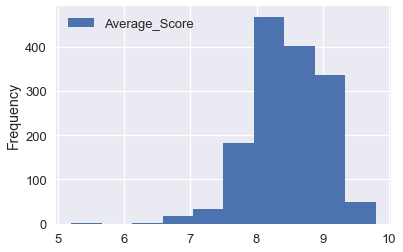

In [73]:
data_plot = data[["Hotel_Name","Average_Score"]].drop_duplicates()
data_plot_avg = data_plot.plot.hist()
plt.show()

So it seems most ratings are between 7.6 and 9.2

In [74]:
max_rating = data.Average_Score.max()
max_rating

9.8000000000000007

In [75]:
min_rating = data.Average_Score.min() 
min_rating

5.2000000000000002

In [76]:
mean_rating = data.Average_Score.mean()
print('The mean rating is '+ str(mean_rating))


The mean rating is 8.397486902260287


The ratings are between 5.2 and 9.8, with a mean of 8.4

### Natural Language Processing - Tokenize the reviews and build a bag-of-words model
The first goal is to do sentiment analysis on the positive and negative reviews. To do this, we need to first tokenize the words using nltk, remove the stopwords, and build a bag-of-words model.

In [77]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/xinrucheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
pos_reviews = data.Positive_Review
neg_reviews = data.Negative_Review
print(type(pos_reviews))

<class 'pandas.core.series.Series'>


In [79]:
pos_reviews_words = nltk.word_tokenize(pos_reviews[1]) #word_tokenize only works for text file, not whole series
#len(pos_reviews[0])
#print(pos_reviews[1])
print(pos_reviews_words) #tokenize and print the second review (the first was too short)

['No', 'real', 'complaints', 'the', 'hotel', 'was', 'great', 'great', 'location', 'surroundings', 'rooms', 'amenities', 'and', 'service', 'Two', 'recommendations', 'however', 'firstly', 'the', 'staff', 'upon', 'check', 'in', 'are', 'very', 'confusing', 'regarding', 'deposit', 'payments', 'and', 'the', 'staff', 'offer', 'you', 'upon', 'checkout', 'to', 'refund', 'your', 'original', 'payment', 'and', 'you', 'can', 'make', 'a', 'new', 'one', 'Bit', 'confusing', 'Secondly', 'the', 'on', 'site', 'restaurant', 'is', 'a', 'bit', 'lacking', 'very', 'well', 'thought', 'out', 'and', 'excellent', 'quality', 'food', 'for', 'anyone', 'of', 'a', 'vegetarian', 'or', 'vegan', 'background', 'but', 'even', 'a', 'wrap', 'or', 'toasted', 'sandwich', 'option', 'would', 'be', 'great', 'Aside', 'from', 'those', 'minor', 'minor', 'things', 'fantastic', 'spot', 'and', 'will', 'be', 'back', 'when', 'i', 'return', 'to', 'Amsterdam']


In [80]:
print(type(pos_reviews[:5]))

<class 'pandas.core.series.Series'>


In [81]:
len(pos_reviews)

515738

In [82]:
#pos_reviews_wordslist = []  ##*Dec 15 doesn't work for bag-of-words because can't distinguish between neighbouring reviews
#for i in range(5):
#for i in range(515738): #get error if put len+1 here, needed to switch from pos_reviews[1] to .iloc[1]
#    pos_reviews_wordslist.extend(nltk.word_tokenize(pos_reviews.iloc[i])) #tokenize text in each positive review
#    return pos_reviews_wordslist

In [83]:
pos_reviews_wordslist = []  
#for i in range(5):
for i in range(515738): #get error if put len+1 here, needed to switch from pos_reviews[1] to .iloc[1]
    pos_reviews_wordslist.append(nltk.word_tokenize(pos_reviews.iloc[i])) #tokenize text in each positive review

In [84]:
print(pos_reviews_wordslist[:5])

[['Only', 'the', 'park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful'], ['No', 'real', 'complaints', 'the', 'hotel', 'was', 'great', 'great', 'location', 'surroundings', 'rooms', 'amenities', 'and', 'service', 'Two', 'recommendations', 'however', 'firstly', 'the', 'staff', 'upon', 'check', 'in', 'are', 'very', 'confusing', 'regarding', 'deposit', 'payments', 'and', 'the', 'staff', 'offer', 'you', 'upon', 'checkout', 'to', 'refund', 'your', 'original', 'payment', 'and', 'you', 'can', 'make', 'a', 'new', 'one', 'Bit', 'confusing', 'Secondly', 'the', 'on', 'site', 'restaurant', 'is', 'a', 'bit', 'lacking', 'very', 'well', 'thought', 'out', 'and', 'excellent', 'quality', 'food', 'for', 'anyone', 'of', 'a', 'vegetarian', 'or', 'vegan', 'background', 'but', 'even', 'a', 'wrap', 'or', 'toasted', 'sandwich', 'option', 'would', 'be', 'great', 'Aside', 'from', 'those', 'minor', 'minor', 'things', 'fantastic', 'spot', 'and', 'will', 'be', 'back', 'when', 'i', 'return', 'to', 'Amsterdam'], 

In [85]:
len(pos_reviews_wordslist)

515738

In [86]:
type(pos_reviews_wordslist)

list

In [88]:
neg_reviews_wordslist = [] #repeat tokenization for negative reviews
#for i in range(5):
for i in range(515738): #get error if put len+1 here, needed to switch from pos_reviews[1] to .iloc[1]
    neg_reviews_wordslist.append(nltk.word_tokenize(neg_reviews.iloc[i])) #tokenize text in each negative review as alist, append that to original list
#    return pos_reviews_wordslist as a nested list with each review as a sublist

In [89]:
print(neg_reviews_wordslist[-5:])

[['no', 'trolly', 'or', 'staff', 'to', 'help', 'you', 'take', 'the', 'luggage', 'to', 'the', 'room'], ['The', 'hotel', 'looks', 'like', '3', 'but', 'surely', 'not', '4'], ['The', 'ac', 'was', 'useless', 'It', 'was', 'a', 'hot', 'week', 'in', 'vienna', 'and', 'it', 'only', 'gave', 'more', 'hot', 'air'], ['No', 'Negative'], ['I', 'was', 'in', '3rd', 'floor', 'It', 'didn', 't', 'work', 'Free', 'Wife']]


Now we have tokenized all the positive and negative reviews with punctuation already removed in the raw data, we will remove the stop words and build a bag-of-words model with the filtered words

In [90]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xinrucheng/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [91]:
len(nltk.corpus.stopwords.words("english")) #all the reviews in this dataset are in English

179

In [92]:
nltk.corpus.stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [93]:
useless_words = nltk.corpus.stopwords.words("english")
type(useless_words)

list

In [94]:
#useless_words

In [95]:
def build_bag_of_words_filtered(words):
    return {
        #word:1 for word in words
        word:1 for word in words \
        if not word in useless_words} 

In [96]:
assert len(build_bag_of_words_filtered(["what", "the"]))==0, "Make sure we are filtering out stopwords"

We can build the negative and positive features separately using the build-bag-of-words function
The format of the positive features should be:

    [
        ( { "here":1, "some":1, "words":1 }, "pos" ),
        ( { "another":1, "tweet":1}, "pos" )
    ]
    
It is a list of tuples, the first element is a dictionary of the words with 1 if that word appears, the second the "pos" or "neg" string.

In [97]:
positive_features = None
positive_features = [
    (build_bag_of_words_filtered(review),'pos') \
    for review in pos_reviews_wordslist 
]


In [98]:
positive_features[-1]

({'kind': 1, 'staff': 1}, 'pos')

In [99]:
type(positive_features)

list

In [100]:
negative_features = None
negative_features = [
    (build_bag_of_words_filtered(review),'neg') \
    for review in neg_reviews_wordslist 
]


In [101]:
negative_features[-2:]

[({'Negative': 1, 'No': 1}, 'neg'),
 ({'3rd': 1, 'Free': 1, 'I': 1, 'It': 1, 'Wife': 1, 'floor': 1, 'work': 1},
  'neg')]

### Train a classifier for sentiment analysis

We will use the Naive Bayes classifier as explained in lecture; train it on 80 percent of the data, and test on the remaining 20 percent

In [102]:
from nltk.classify import NaiveBayesClassifier

In [103]:
#Using 80% of the data for training, the rest for validation:
split = int(len(positive_features) * 0.8)
split

412590

In [104]:
classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])


In [105]:
#check the accuracy on the training and test sets, turning accuracy into percentage:

In [106]:
training_accuracy = None #check accuracy of training set
training_accuracy = nltk.classify.util.accuracy(classifier, positive_features[:split] + negative_features[:split])*100
training_accuracy

93.48687559078019

**The training accuracy is around 93.5 percent, which is quite good, as expected since the classifier has seen the data (I was actually expecting it to be a bit higher)**

In [107]:
test_accuracy = None #check accuracy of test set
test_accuracy = nltk.classify.util.accuracy(classifier, positive_features[split:] + negative_features[split:])*100
test_accuracy

92.54663202388801

#### The test accuracy is over 92.5 percent, which is really good and almost as high as the training accuracy. It is also significantly higher for the estimated human prediction accuracy of 80%. 

#### This shows the Naive Bayes Classifier is a good method to use for this analysis since it performs well for this type of dataset. 

The accuracy for the test is also very high compared to the movie review dataset from lecture. We can now print the most informative features below to understand why. The most informative features are the words that mostly identify a positive or a negative review, or the words that had the greatest effect on the prediction accuracy.

In [108]:
classifier.show_most_informative_features()

Most Informative Features
                Negative = 1                 neg : pos    =  22605.9 : 1.0
                Positive = 1                 pos : neg    =  11601.8 : 1.0
                   Comfy = 1                 pos : neg    =    234.6 : 1.0
             Outstanding = 1                 pos : neg    =    211.7 : 1.0
                Friendly = 1                 pos : neg    =    208.5 : 1.0
                Spacious = 1                 pos : neg    =    184.5 : 1.0
               Brilliant = 1                 pos : neg    =    168.8 : 1.0
                 History = 1                 pos : neg    =    154.3 : 1.0
                Charming = 1                 pos : neg    =    153.7 : 1.0
             Beautifully = 1                 pos : neg    =    133.4 : 1.0


As we can see, the words "negative" and "positive" appeared in lots of reviews and are quite informative. But due to the nature of the dataset (worded like a questionaire), lots of reviews actually say "no positive" or "no negative" which can be tricky since they would represent the opposite sentiment, which is why the ratio is not 100 percent (number of reviews versus 1). 

Since 9 out of 10 most informative features indicate high accuracy for a positive prediction, I decided to look at more of these features:

In [109]:
classifier.show_most_informative_features(50)

Most Informative Features
                Negative = 1                 neg : pos    =  22605.9 : 1.0
                Positive = 1                 pos : neg    =  11601.8 : 1.0
                   Comfy = 1                 pos : neg    =    234.6 : 1.0
             Outstanding = 1                 pos : neg    =    211.7 : 1.0
                Friendly = 1                 pos : neg    =    208.5 : 1.0
                Spacious = 1                 pos : neg    =    184.5 : 1.0
               Brilliant = 1                 pos : neg    =    168.8 : 1.0
                 History = 1                 pos : neg    =    154.3 : 1.0
                Charming = 1                 pos : neg    =    153.7 : 1.0
             Beautifully = 1                 pos : neg    =    133.4 : 1.0
              Convenient = 1                 pos : neg    =    132.4 : 1.0
                 Helpful = 1                 pos : neg    =    125.3 : 1.0
               Excellent = 1                 pos : neg    =    121.8 : 1.0

#### From this list of most informative features, it's interesting to note that quite a few of the informative words from positive reviews refer to the hotel *staff* (Friendly, Helpful, Efficient) and *location* (Convenient, Conveniently, Convenience), while the most informative words for negative reviews seem to refer mostly to the *facilities* (Thin, Charged, Unusable, Lack, unreliable, damaged, Loud, Noisy, Smelly, Missing, loudly)

### Relationship between reviewer nationality and rating
For the second research question, I am interested in finding out the relationship between reviewer nationality and their ratings. Since all the hotels in this dataset are located in Europe, do European travellers tend to give a higher or lower rating? Which country gives the highest and lowest ratings on average? As part of the analysis, I will try to use different types of visualizations to present findings.

We also want to explore whether there is a relationship between the number of reviews a reviewer has given in this dataset and the review score they give to a particular hotel (a larger number of reviews indicates the reviewer is an experienced traveller and often stays at this type of hotels). One hypothesis is a more experienced traveller might have higher standards and give a lower rating.

In [110]:
#try using seaborn# for scatter plot, both axes need to be numbers! reviewer experience (#of reviews) vs rating?

In [111]:
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="dark", color_codes=True)

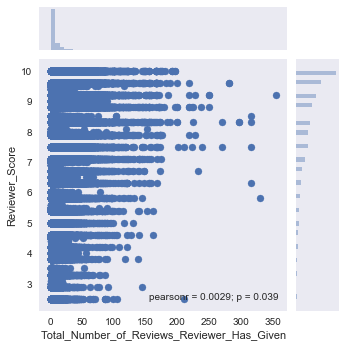

In [112]:
#sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
sns.jointplot(x="Total_Number_of_Reviews_Reviewer_Has_Given", y="Reviewer_Score", data = data, size=5) 


In [113]:
sns.axes_style() #check plot style 

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [114]:
#From SciPy documentation, equation displayed shows Pearson correlation: 
#The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.
#Almost 0 --> no correlation between reviewer score and number of  reviews given

From the plot above, we do not see a clear relationship between reviewer score for a particular hotel and the total number of reviews the reviewer has given. There are even a few outliers where the number of reviews is high, and the reviewer score is also above 8.5. It seems most reviewers have given a low number of reviews in this dataset, I want to adjust the scale of the plot axes to see this better.

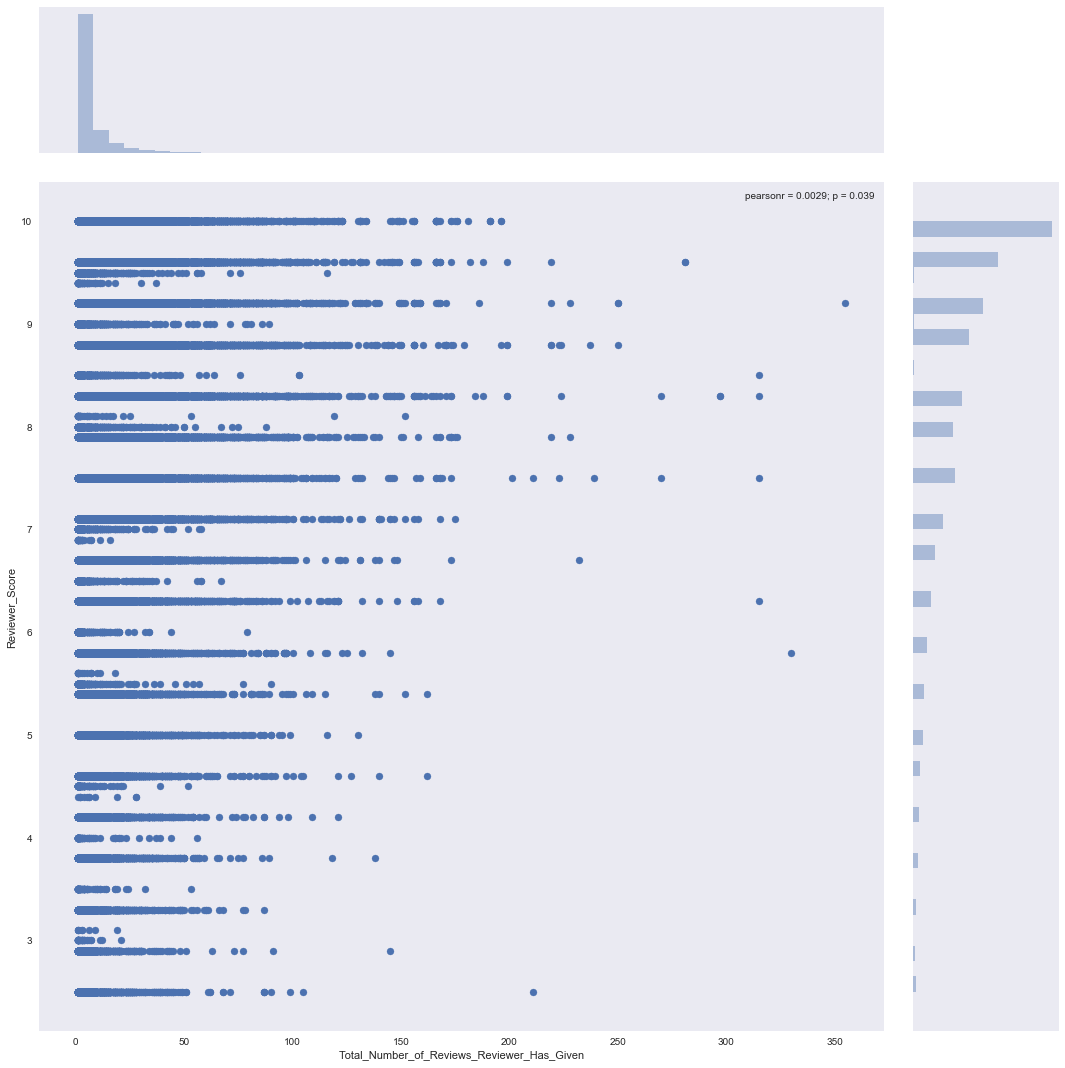

In [115]:

sns_plot=sns.jointplot(x="Total_Number_of_Reviews_Reviewer_Has_Given", y="Reviewer_Score", data = data, size=15) 


In [116]:
sns_plot.savefig('sns_scatter.png') #saved sns scatter plot in JupyterNotebooks folder

In [117]:
#change plot to presentation style, from seaborn documentation:

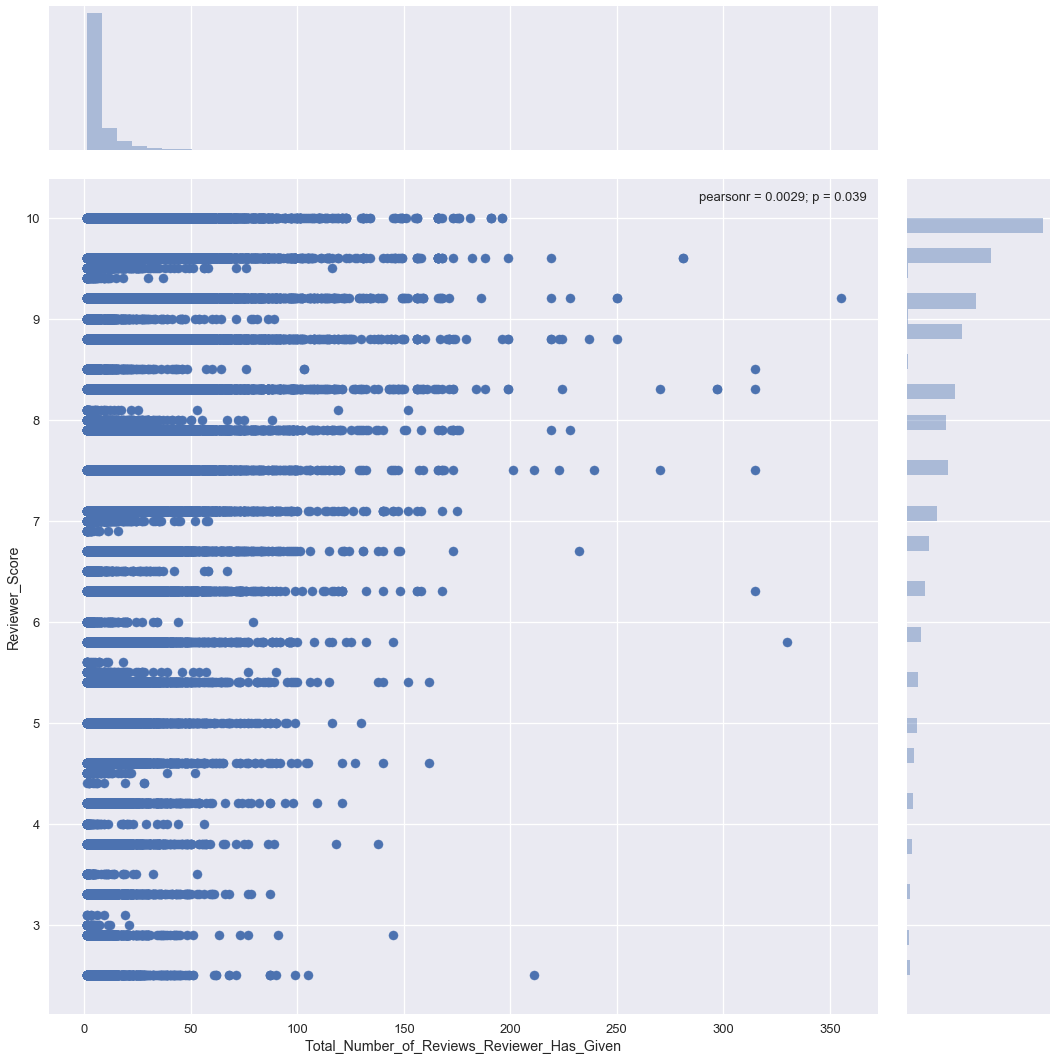

In [118]:
sns.set() #reset default parameters
sns.set_context("talk")
sns_plot=sns.jointplot(x="Total_Number_of_Reviews_Reviewer_Has_Given", y="Reviewer_Score", data = data, size=15) 


In [119]:
sns_plot.savefig('sns_scatter_talk.png') #save larger plot for presentation

Try plotting this without seaborn library:

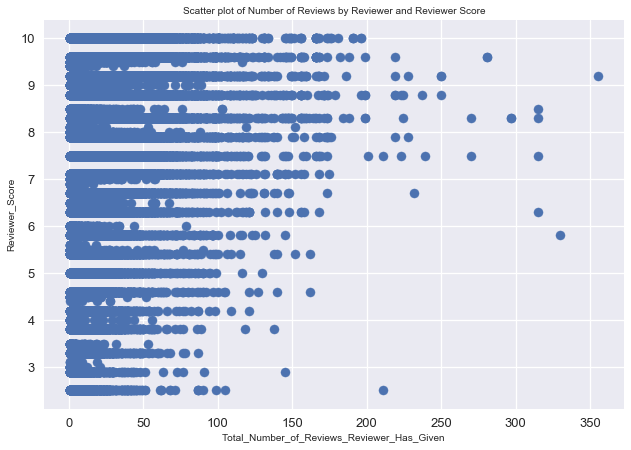

In [120]:
def plot_scatter(df, x, y):
    ### BEGIN SOLUTION
    fig, axis = plt.subplots()
    # Grid lines, Xticks, Xlabel, Ylabel
    
    axis.yaxis.grid(True)
    axis.set_title('Scatter plot of Number of Reviews by Reviewer and Reviewer Score',fontsize=10)
    axis.set_xlabel(x,fontsize=10)
    axis.set_ylabel(y,fontsize=10)


    X = df[x]
    Y = df[y]

    #axis.semilogx(X)
    axis.scatter(X, Y)
    plt.show()

plot_scatter(data, 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score')



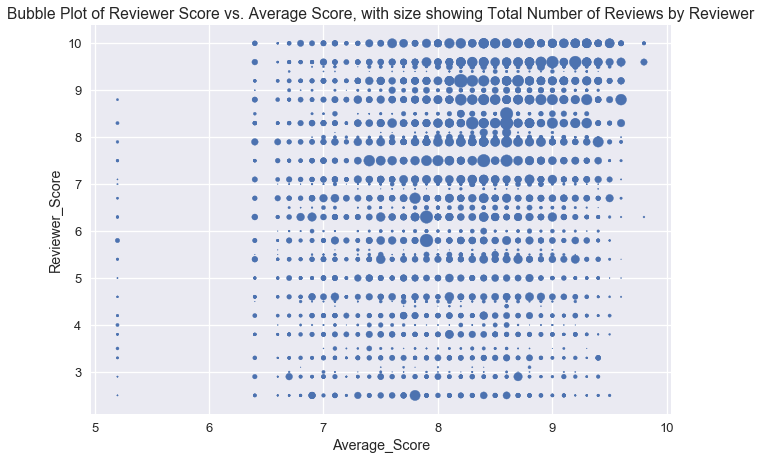

In [121]:

#scatter-bubble plot for nations :
bbplot = data.plot.scatter(x='Average_Score', y='Reviewer_Score', s=data['Total_Number_of_Reviews_Reviewer_Has_Given']*0.5, title = "Bubble Plot of Reviewer Score vs. Average Score, with size showing Total Number of Reviews by Reviewer");


Get bubble size:

In [12]:
max(data.Total_Number_of_Reviews_Reviewer_Has_Given.unique())



355

**(When revisiting this project in May 2019) Realized there is no correlation because the column Reviewer_Score contains scores for all the hotels from all reviewers, plus the ones that only left a score without reviewing.
To take care of that discrepancy, would probably need to filter out the scores posted by those who did not leave a review...(but focusing on another project at the moment, and the main goal of this project -- using Naive Bayes Classifier to do sentiment analysis on hotel reviews dataset -- was successfully achieved**